In [112]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten,kmeans2
import numpy as np
import matplotlib.pyplot as plt
import requests

In [113]:
url ='https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()
elements_df = pd.DataFrame(json['elements']) #Creating data frame for element
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [128]:
teams_df['strength_overall_home'].min()

1045

CLUSTERING BASED ON PERFORMANCE

In [90]:
file = "csvs/2022_player_data.csv"
start_price_file = "csvs/2022_2023_start_price.csv"

input = pd.read_csv(file)


In [91]:
input.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [133]:
mid_features = ['influence', 'threat', 'ict_index_rank','team_code', 'bps', 'creativity_rank', 'threat_rank', 'value_season',  'creativity', 'form','in_dreamteam', 'goals_scored','corners_and_indirect_freekicks_order', 'direct_freekicks_order','penalties_order']
input.fillna(0, inplace= True)
mid_df = input[input.element_type == 3][mid_features]
mid_df = mid_df.astype(float)
mid_df['team_code'] = mid_df['team_code'].astype(int)
mid_df = mid_df.join(teams_df[['strength_overall_home','strength_attack_home','strength_attack_away','strength_overall_away']], on = 'team_code', how='left')
mid_df.fillna(1000, inplace= True)

In [134]:
normalized = whiten(np.array(mid_df), check_finite= True)
normalized

array([[ 0.        ,  0.        ,  3.13463459, ..., 14.23562812,
        12.1147685 , 11.33846576],
       [ 1.56192418,  0.8249501 ,  0.49179124, ..., 14.23562812,
        12.1147685 , 11.33846576],
       [ 0.64467887,  0.15428456,  1.48820305, ..., 14.23562812,
        12.1147685 , 11.33846576],
       ...,
       [ 0.        ,  0.        ,  2.81390118, ..., 12.94148011,
        10.91420585, 10.0340405 ],
       [ 0.        ,  0.        ,  2.77113672, ..., 12.94148011,
        10.91420585, 10.0340405 ],
       [ 0.39265368,  0.37154241,  1.56517907, ..., 12.94148011,
        10.91420585, 10.0340405 ]])

(309,)


/Users/max/Desktop/Code/Fantasy_premier_league/temp_env/lib/python3.8/site-packages/scipy/cluster/vq.py:602: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


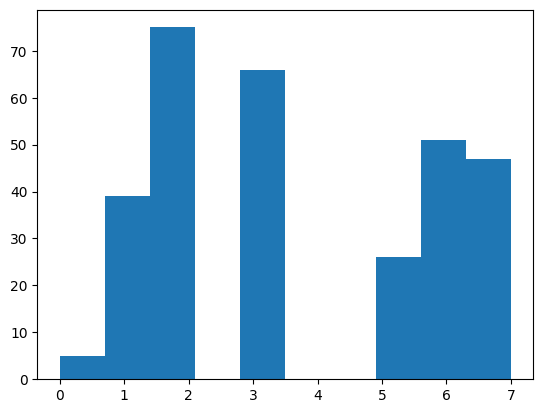

In [142]:
cluster,distort = kmeans2(normalized, 8)
print(distort.shape)
plt.hist(distort)
mid_df['category'] = distort.tolist()
mid_df['code'] = input[input.element_type == 3].code

In [143]:
mid_df['name'] = input['first_name'] + " " + input['second_name']

In [148]:
mid_df[mid_df['category'] == 0].name.to_list()

['Sadio Mané',
 'Mohamed Salah',
 'Kevin De Bruyne',
 'Heung-Min Son',
 'Jarrod Bowen']

In [86]:
start_price = pd.read_csv(start_price_file)
start_price = start_price[start_price.columns.tolist()[:-1]]
start_price.astype(float)
start_price[start_price.element_type == 3]

,Unnamed: 0,now_cost,element_type,code,team,team_code,cost
2,2,50,3,84450,1,3,5.0
3,3,45,3,153256,1,3,4.5
5,5,50,3,167199,1,3,5.0
6,6,65,3,184029,1,3,6.5
8,8,55,3,195735,1,3,5.5
...,...,...,...,...,...,...,...
523,523,55,3,247632,20,39,5.5
527,527,50,3,510363,20,39,5.0
528,528,55,3,159533,20,39,5.5
530,530,55,3,222531,20,39,5.5


<AxesSubplot: ylabel='Frequency'>

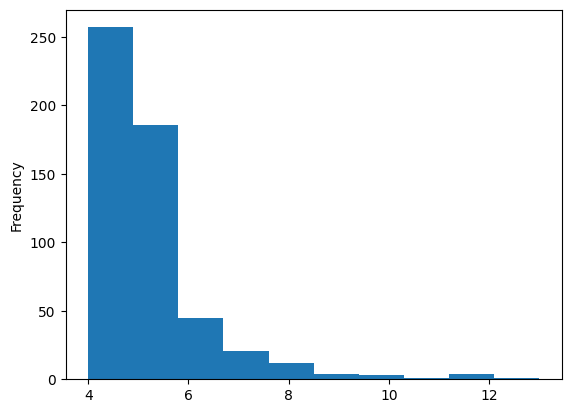

In [110]:
start_price.cost.plot(kind='hist')